## Ensemble Learning and Random Forest

In [1]:
from __future__ import division,print_function,unicode_literals

import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Hard Voting

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state = 42)
rf_clf = RandomForestClassifier(random_state=42)
svc_clf = SVC(random_state= 42)

vc_clf = VotingClassifier(estimators=[('lr',lr_clf),('rf',rf_clf),('svc',svc_clf)],voting = 'hard')
vc_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [4]:
from sklearn.metrics import accuracy_score

for clf in (vc_clf,lr_clf,rf_clf,svc_clf):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    print(clf.__class__.__name__,': {}'.format(accuracy_score(y_test,pred)))

VotingClassifier : 0.87
LogisticRegression : 0.85
RandomForestClassifier : 0.88
SVC : 0.87


/Users/nilvarshney/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Soft Voting

Soft voting works on predict_proba

In [5]:
lr_clf = LogisticRegression(random_state = 42)
rf_clf = RandomForestClassifier(random_state=42)
svc_clf = SVC(random_state= 42,probability=True) # SVC by default is not calculate probability

vc_clf = VotingClassifier(estimators=[('lr',lr_clf),('rf',rf_clf),('svc',svc_clf)],voting = 'soft')
vc_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [6]:
from sklearn.metrics import accuracy_score

for clf in (vc_clf,lr_clf,rf_clf,svc_clf):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    print(clf.__class__.__name__,': {}'.format(accuracy_score(y_test,pred)))

VotingClassifier : 0.9
LogisticRegression : 0.85
RandomForestClassifier : 0.88
SVC : 0.87


/Users/nilvarshney/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Bagging ensembles

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bc_clf = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(random_state=42),
    n_estimators = 500,
    max_samples = 100,
    bootstrap = True,
    n_jobs=-1, 
    random_state=42
)
bc_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [8]:
pred = bc_clf.predict(X_test)
train_pred = bc_clf.predict(X_train)
print(bc_clf.__class__.__name__,'(Test): {:.3f}'.format(accuracy_score(y_test,pred)))
print(bc_clf.__class__.__name__,'(Train): {:.3f}'.format(accuracy_score(y_train,train_pred)))

BaggingClassifier (Test): 0.900
BaggingClassifier (Train): 0.938


In [9]:
# out of Bag Eveluation
bc_clf = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(random_state=42),
    n_estimators = 500,
    max_samples = 100,
    bootstrap = True,
    n_jobs=-1, 
    random_state=42,
    oob_score=True # Whether to use out-of-bag samples to estimate the generalization error.
)
bc_clf.fit(X_train,y_train)
print('Out of Bag Score {}'.format(bc_clf.oob_score_))

Out of Bag Score 0.9175


According to this oob evaluation, this BaggingClassifier is likely to achieve about 93.1% accuracy on the test set. We have already calculated above. Test Score it 0.9 which is smaller then Out of Bag Score.

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1, random_state=42)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
train_pred = rf_clf.predict(X_train)
print(rf_clf.__class__.__name__,'(Test): {:.3f}'.format(accuracy_score(y_test,pred)))
print(rf_clf.__class__.__name__,'(Train): {:.3f}'.format(accuracy_score(y_train,train_pred)))

RandomForestClassifier (Test): 0.890
RandomForestClassifier (Train): 0.955


## Feature Importance

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()

rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(iris.data,iris.target)
print('Feature Importance')
for imortance, name in zip(rf_clf.feature_importances_,iris.feature_names):
    print('Feature {} \t: {:.3}'.format(name,imortance))

Feature Importance
Feature sepal length (cm) 	: 0.112
Feature sepal width (cm) 	: 0.0231
Feature petal length (cm) 	: 0.441
Feature petal width (cm) 	: 0.423


## AdaBoost

In [12]:
from sklearn.ensemble import AdaBoostClassifier

abc_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42,max_depth=1),n_estimators= 100, 
                            learning_rate=0.5, algorithm='SAMME.R', random_state=42)
abc_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=0.5, n_estimators=100, random_state=42)

In [13]:
pred = abc_clf.predict(X_test)
train_pred = abc_clf.predict(X_train)
print(abc_clf.__class__.__name__,'(Test): {:.3f}'.format(accuracy_score(y_test,pred)))
print(abc_clf.__class__.__name__,'(Train): {:.3f}'.format(accuracy_score(y_train,train_pred)))

AdaBoostClassifier (Test): 0.890
AdaBoostClassifier (Train): 0.963


## Gradient Boosting

In [14]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [16]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [17]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [18]:
X_new = np.array([[0.8]])

In [19]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [21]:
y_pred = gbrt.predict(X_new)
y_pred

array([0.75026781])

In [22]:
# slow learning 
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=400, learning_rate=0.1, random_state=42) 
gbrt_slow.fit(X, y)
y_pred = gbrt_slow.predict(X_new)
y_pred

array([0.74718371])

### Gradient Boosting with Early stopping

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=300,random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
print('Best Estimators {}'.format(bst_n_estimators))
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators,random_state=42)
gbrt_best.fit(X_train, y_train)

Best Estimators 79


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=79, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [24]:
y_pred = gbrt_best.predict(X_new)
y_pred

array([0.6629195])

[]

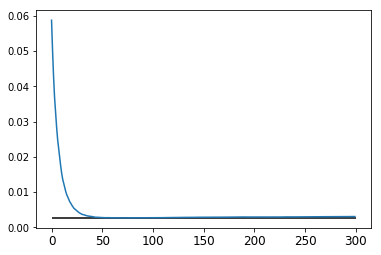

In [33]:
estimators = range(1,200)
plt.plot(errors)
plt.hlines(np.min(errors),0,300)
plt.plot()

In [32]:
np.min(errors)

0.002631034539199153